# 1. Introdução
        Esse é um projeto da turma de probabilidade do IMD/UFRN, cujo o objetivo é ultilizar as ferramentas aprendidas até o momento para fazer uma anilise dos dados abertos da UFRN.
        Nossa equipe ira usar essas ferramentas para analizar mais afundo os investimentos realizados pela UFRN em obras

# 2. Conhecendo nossos dados
        É fundamental que tenhamos um primeiro contato com os nossos dados
        Para isso vamos importar a biblioteca pandas e dar uma olhada em nosso arquivo

In [2]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

#abrindo o arquivo "obras.csv"
obras = pd.read_csv('obras.csv',sep=';')
#conhecendo nossas colunas e linhas
obras

,id_obra,descricao,periodo,qtd_dias,status_obra,licitacao,empresa,modalidade,valor,fonte_recurso,vigencia_projeto,projeto,id_unidade_responsavel,unidade_responsavel,Unnamed: 14
0,493,CONSTRUÇÃO DO BLOCO H DO SETOR DE AULAS TEÓRIC...,23/03/2005 - 19/11/2005,240,FINALIZADA,6/2004,03.166.687/0001-28 - CRS-CONSTRUÇÕES E EMPREE...,CONCORRÊNCIA,"R$ 829.454,21",NaN,NaN,NaN,NaN,NaN,NaN
1,521,CONSTRUÇÃO DO BLOCO A1 DO SETOR DE AULAS TEÓRI...,04/05/2005 - 30/12/2005,240,FINALIZADA,7/2004,03.166.687/0001-28 - CRS-CONSTRUÇÕES E EMPREE...,CONCORRÊNCIA,"R$ 833.702,12",NaN,20/04/2005 - 20/11/2005,19O ENECIC/2005 (852005),NaN,NaN,NaN
2,848,CONSTRUÇÃO DO SETOR DE ANTIBIÓTICOS PRODUÇÃO D...,02/06/2005 - 29/01/2006,240,FINALIZADA,4/2004,03.722.669/0001-85 - CONSTRUTORA CAGEO LTDA,CONCORRÊNCIA,"R$ 1.561.230,93",TESOURO - EDUCAÇÃO (112000000),NaN,NaN,252.0,NUCLEO DE PESQUISA EM ALIMENTOS E MEDICAMENTOS,NaN
3,925,Complementação da 2ª Etapa e Realização da 3ª ...,28/01/2005 - 22/01/2006,360,FINALIZADA,2/2004,40.761.454/0001-08 - AR PROJETOS & CONSTRUÇÕE...,CONCORRÊNCIA,"R$ 814.550,74",NaN,20/12/2002 - 31/07/2007,UFRN/CONV.133/02 - HUOL (862003),446.0,HOSPITAL UNIVERSITÁRIO ONOFRE LOPES,NaN
4,182,CONSTRUÇÃO DO DEPARTAMENTO DE FISIOTERAPIA - CCS,08/02/2006 - 02/02/2007,360,FINALIZADA,1/2005,01.694.415/0001-75 - HASTE-HABITAÇÃO E SERVIÇ...,CONCORRÊNCIA,"R$ 1.455.865,61",NaN,20/12/2004 - 30/03/2010,CONVENIO 121/2004 UFRN (732005),446.0,HOSPITAL UNIVERSITÁRIO ONOFRE LOPES,NaN
5,185,CONSTRUÇÃO DO NOVO SETOR DE INTERNAMENTO DO HU...,07/03/2006 - 31/12/2006,300,FINALIZADA,3/2005,01.694.415/0001-75 - HASTE-HABITAÇÃO E SERVIÇ...,CONCORRÊNCIA,"R$ 4.900.000,00",NaN,28/12/2004 - 31/12/2009,CONVENIO 120/04 MELHORIA DA INFRA ESTRUTURA DO...,NaN,NaN,NaN
6,282,ADAPTAÇÃO DE AMBIENTES DE ENSINO NO HOSPITAL U...,11/09/2006 - 08/05/2007,240,FINALIZADA,1/2006,04.145.787/0001-30 - ECCL - EMPREENDIMENTOS E...,CONCORRÊNCIA,"R$ 1.153.423,68",NaN,20/12/2005 - 31/12/2011,FUNPEC/UFRN/CONV. 134/2005 - EMENDA PARLAMENTA...,446.0,HOSPITAL UNIVERSITÁRIO ONOFRE LOPES,NaN
7,2341,CONSTRUÇÃO DA 1ª ETAPA DO PAVILHÃO DIDÁTICO DO...,07/07/2007 - 31/03/2008,270,FINALIZADA,1/2007,09.376.468/0001-50 - CST CONSTRUCAO E SERV TE...,CONCORRÊNCIA,"R$ 1.210.149,93",NaN,31/05/2005 - 30/05/2008,CENPES/AVALIACAO DE CO2 (1342005),440.0,CENTRO DE BIOCIÊNCIAS,NaN
8,2419,CONSTRUÇÃO DO PAVILHÃO ACADÊMICO DO CAMPUS AVA...,10/08/2007 - 04/06/2008,300,FINALIZADA,2/2007,04.201.519/0001-99 - ESTRUTURAL EDIFICAÇÕES E...,CONCORRÊNCIA,"R$ 1.248.942,91",NaN,23/01/2006 - 23/06/2010,FINEP/REDE 01 GEOFISICA DA EXPLORACAO/FASE 2 -...,1646.0,CAMPUS AVANÇADO DE SANTA CRUZ,NaN
9,3044,CONSTRUÇÃO DA 1ª ETAPA DO PAVILHÃO DE CLÍNICAS...,06/12/2007 - 02/08/2008,240,FINALIZADA,3/2007,07.443.865/0001-71 - AJF INCORPORAÇÃO CONSTRU...,CONCORRÊNCIA,"R$ 1.314.119,70",SUS(1513689610) (151368961),22/12/2003 - 30/04/2011,UFRN CONV.128-03/LAB. DCS (2242003),441.0,CENTRO DE CIÊNCIAS DA SAÚDE,NaN


# 3. Fazendo algumas alterações
        Podemos observar no bloco anterior que temos alguns problemas como valores 'NaN' em algumas colunas, valores da mesma coluna escritas com formatos um pouco diferentes e também seria ter culunas um pouco diferentes das que temos para fazer algumas coisas, então vamos fazer algumas alterações nos nossos dados e depois vamos dar uma outra olhada
            

In [4]:
#limpando a coluna "fonte_recurso"
cleaned_column = []
for i in obras.fonte_recurso:
    if(type(i) == str):
        i = i.replace(' (','(')
        i = i.split('(')
        i = i[0]
        cleaned_column.append(i)
    else:
        cleaned_column.append(i)
obras['cleaned_fonts'] = cleaned_column

#limpando a coluna "valor"
cleaned_column = []
for i in obras.valor:
    i = i.replace(' ','')
    i = i.replace('$','$ ')
    cleaned_column.append(i)
obras['valor'] = cleaned_column

#criando a nova coluna "value" usando a coluna "valor"
new_column = []
for i in obras.valor:
    i = i.replace('R$ ','')
    i = i.replace('.','')
    i = i.replace(',','.')
    new_column.append(float(i))
obras['value'] = new_column

#criando a nova coluna "bgn_construct" usando a coluna "periodo"
new_column = []
for i in obras.periodo:
    i = i.split(' ')
    new_column.append(i[0])
obras['bgn_construct'] = pd.to_datetime(new_column)
obras.loc[:10,['bgn_construct']]

#por fim, reordenando a index do DataFrame de acordo com a coluna "bgn_construct"
obras = obras.sort_values('bgn_construct')
obras.loc[:]

,id_obra,descricao,periodo,qtd_dias,status_obra,licitacao,empresa,modalidade,valor,fonte_recurso,vigencia_projeto,projeto,id_unidade_responsavel,unidade_responsavel,Unnamed: 14,cleaned_fonts,value,bgn_construct
117,652,FORNECIMENTO E INSTALAÇÃO DE SISTEMA DE FILTRA...,04/11/2004 - 04/12/2004,30,FINALIZADA,512/2004,12.788.774/0001-08 - PH PISCINAS E EQUIPAMENT...,CONVITE,"R$ 35.150,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,35150.00,2004-04-11
374,3702,EXECUÇÃO DO BACKBONE ÓPTICO METROPOLITANO DA U...,23/06/2004 - 19/10/2004,120,FINALIZADA,1/2004,40.761.454/0001-08 - AR PROJETOS & CONSTRUÇÕE...,TOMADA DE PREÇO,"R$ 297.608,41",NaN,18/12/2001 - 30/08/2005,FINEP/CT-INFRA 2001 (172002),605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE,NaN,NaN,297608.41,2004-06-23
116,649,CONSTRUÇÃO DE ADUTORA P5-P1 NO CAMPUS CENTRAL ...,26/06/2004 - 15/07/2004,20,FINALIZADA,503/2004,40.761.454/0001-08 - AR PROJETOS & CONSTRUÇÕE...,CONVITE,"R$ 39.943,34",UNIV.FEDERAL DO RIO GRANDE DO NORTE (250154214),NaN,NaN,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE,NaN,UNIV.FEDERAL DO RIO GRANDE DO NORTE,39943.34,2004-06-26
127,3381,AMPLIAÇÃO DA REITORIA - 1ª FASE,14/07/2004 - 10/11/2004,120,FINALIZADA,506/2004,70.166.210/0001-30 - T. DO R. DE MOURA,CONVITE,"R$ 153.119,69",UNIV.FEDERAL DO RIO GRANDE DO NORTE (250154214),NaN,NaN,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE,NaN,UNIV.FEDERAL DO RIO GRANDE DO NORTE,153119.69,2004-07-14
125,3331,REFORMA DA UNIDADE DE MAMOGRAFIA - MEJC,08/04/2004 - 06/06/2004,60,FINALIZADA,5/2004,03.722.669/0001-85 - CONSTRUTORA CAGEO LTDA,CONVITE,"R$ 51.639,82",UNIV.FEDERAL DO RIO GRANDE DO NORTE (250154214),20/04/2005 - 20/11/2005,19O ENECIC/2005 (852005),447.0,MATERNIDADE ESCOLA JANUÁRIO CICCO,NaN,UNIV.FEDERAL DO RIO GRANDE DO NORTE,51639.82,2004-08-04
128,3390,SERVIÇOS DE ADAPATÇÃO E REFORMAS PARA INSTALAÇ...,27/08/2004 - 25/09/2004,30,FINALIZADA,507/2004,03.722.669/0001-85 - CONSTRUTORA CAGEO LTDA,CONVITE,"R$ 32.120,27",HOSPITAL UNIVERSITARIO ONOFRE LOPES (250153103),NaN,NaN,446.0,HOSPITAL UNIVERSITÁRIO ONOFRE LOPES,NaN,HOSPITAL UNIVERSITARIO ONOFRE LOPES,32120.27,2004-08-27
368,428,CONSTRUÇÃO DO LABORATÓRIO DE PROCESSAMENTO E A...,28/09/2004 - 25/01/2005,120,FINALIZADA,6/2004,35.276.005/0001-26 - ENE-EMPRESA DE ENGENHARI...,TOMADA DE PREÇO,"R$ 168.896,88",APLICACOES FINANCEIRAS (280154215),NaN,NaN,NaN,NaN,NaN,APLICACOES FINANCEIRAS,168896.88,2004-09-28
124,1249,CONSTRUÇÃO DA SUBESTAÇÃO AÉREA DE 225 KVA PARA...,19/10/2004 - 07/11/2004,20,FINALIZADA,504/2004,03.559.710/0001-44 - PAR ENGENHARIA LTDA,CONVITE,"R$ 43.000,30",APLICACOES FINANCEIRAS (280154215),NaN,NaN,NaN,NaN,NaN,APLICACOES FINANCEIRAS,43000.30,2004-10-19
119,662,DEMOLIÇÃO E IMPERMEABILIZAÇÃO DE MANTA ASFÁLTI...,27/10/2004 - 11/12/2004,45,FINALIZADA,515/2004,01.694.415/0001-75 - HASTE-HABITAÇÃO E SERVIÇ...,CONVITE,"R$ 57.098,50",UNIV.FEDERAL DO RIO GRANDE DO NORTE (250154214),NaN,NaN,440.0,CENTRO DE BIOCIÊNCIAS,NaN,UNIV.FEDERAL DO RIO GRANDE DO NORTE,57098.50,2004-10-27
129,3401,CONSTRUÇÃO DE ABRIGO PARA SISTEMA DE BOMBEAMEN...,30/10/2004 - 13/12/2004,45,FINALIZADA,510/2004,40.761.454/0001-08 - AR PROJETOS & CONSTRUÇÕE...,CONVITE,"R$ 14.990,61",UNIV.FEDERAL DO RIO GRANDE DO NORTE (250154214),NaN,NaN,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE,NaN,UNIV.FEDERAL DO RIO GRANDE DO NORTE,14990.61,2004-10-30


# 4. Construindo nosso gráficos
    - Primero vamos construir um gráfico relacionando o valor dos investimentos com o tempo

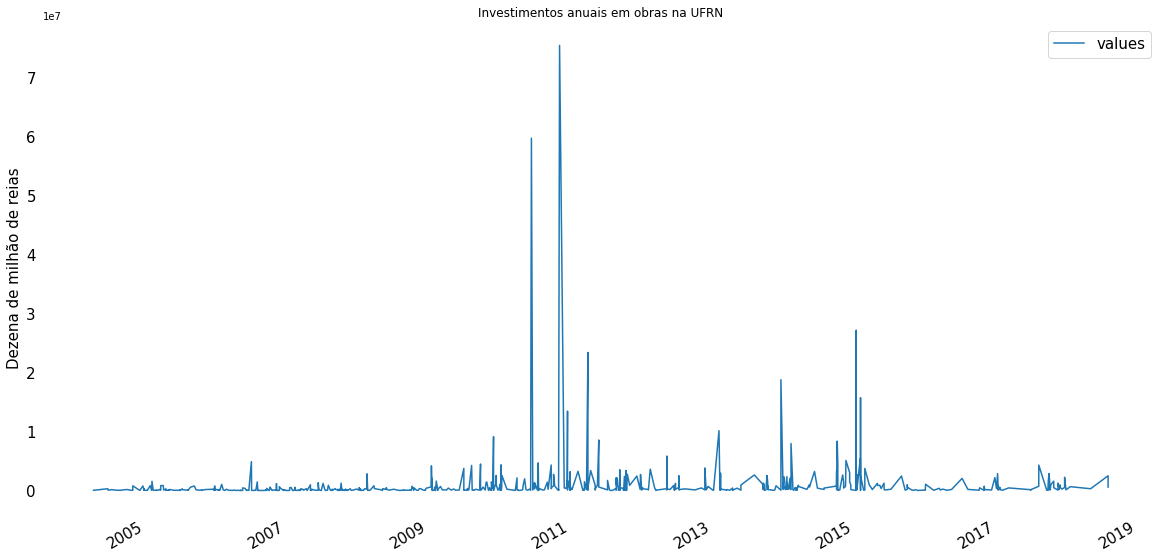

In [91]:
ax = obras.plot(kind='line',y='value', x='bgn_construct'
                       ,title='Investimentos anuais em obras na UFRN',figsize=(20,10),fontsize=15)
ax.legend(loc='upper right',labels=['values'],fontsize=15)

ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xlabel('')
ax.set_ylabel('Dezena de milhão de reias',fontsize=15)

ax.tick_params(left='off',bottom='off',right='off',top='off')

plt.show()

    - Agora vamos criar um gráfico para visualizar melhor o número de obras realizadas por cada fonte

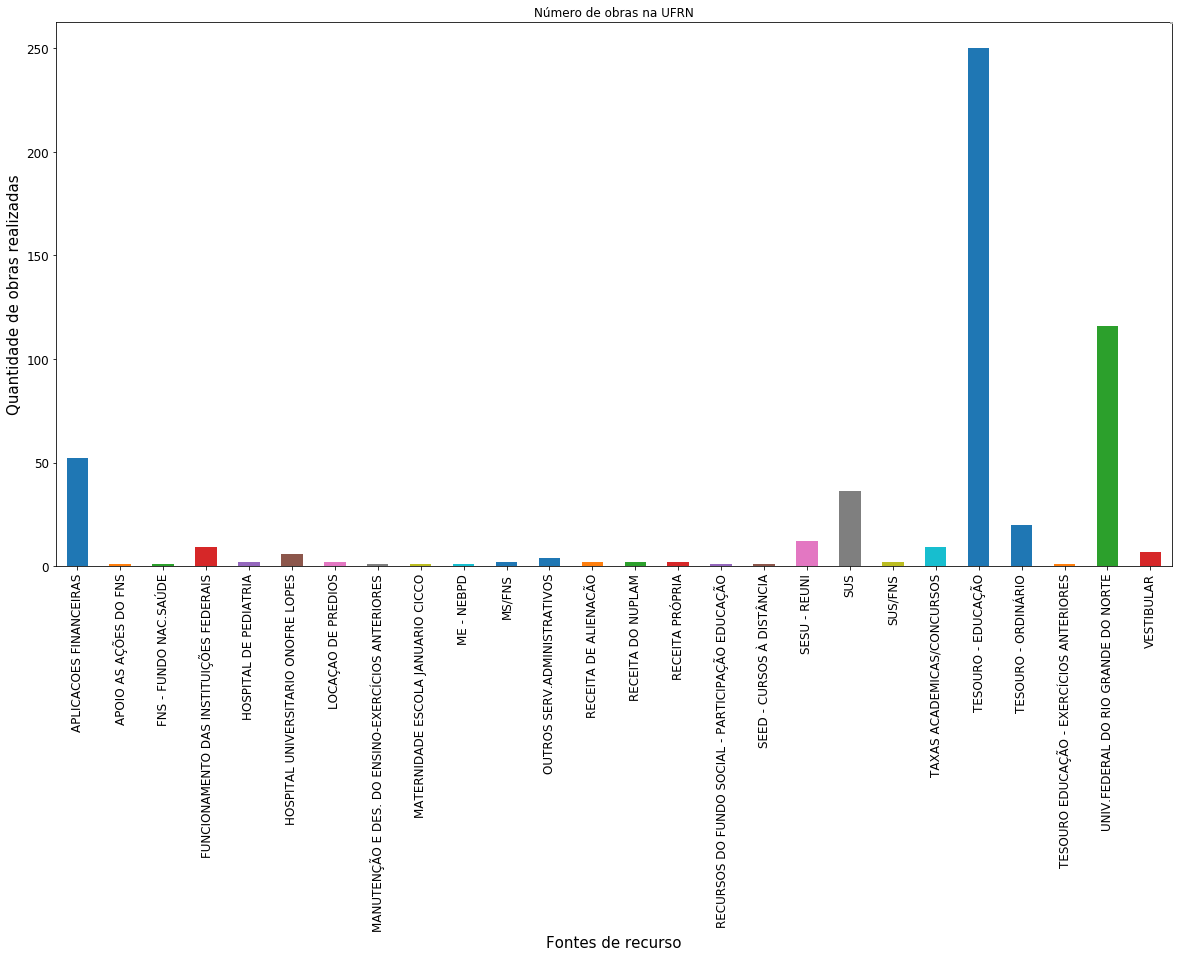

In [92]:
dic_font = pd.value_counts(obras.cleaned_fonts)
col_1=[]
col_2=[]
for key,value in dic_font.items():
    col_1.append(key)
    col_2.append(value)
new_data_fonts_freq = pd.DataFrame({'fonts':col_1,'freq':col_2})

#ordenar pela coluna de nomes
new_data_fonts_freq = new_data_fonts_freq.sort_values('fonts')

ax = new_data_fonts_freq.plot(kind='bar',x='fonts',y='freq',figsize=(20,10),fontsize=12,title='Número de obras na UFRN')
ax.set_xlabel('Fontes de recurso',fontsize = 15)
ax.set_ylabel('Quantidade de obras realizadas',fontsize = 15)
ax.legend(prop={'size':0})

plt.show()